In [44]:
import os

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import metrics
%matplotlib inline

In [46]:
orig_df = pd.read_excel("Assignment3_cluster2.xlsx",sheet_name='2558')
orig_df.head()

,ministry,personnel,operation,invest,subsidy,others
0,a,16500.0,77489.1,74255.0,191059.4,16404.6
1,b,3808.5,2580.7,5924.1,8702.8,12401.5
2,c,85803.6,21613.9,6977.8,3283.1,75270.7
3,d,11239.7,6396.6,2686.6,663.5,164865.8
4,e,2791.6,2398.5,908.7,1035.6,1433.0


<AxesSubplot:>

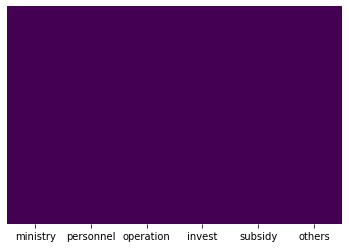

In [47]:
sns.heatmap(orig_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [48]:
orig_df.describe()

,personnel,operation,invest,subsidy,others
count,22.000000,22.000000,22.000000,22.000000,22.000000
mean,28049.540909,10429.004545,15041.490909,31197.850000,14589.172727
std,59456.251477,17172.430834,25992.611225,72007.081226,37418.914395
min,365.600000,394.600000,215.300000,20.800000,121.100000
25%,2100.700000,1228.700000,665.550000,946.350000,814.625000
50%,5904.500000,3194.600000,2828.800000,1874.950000,1441.950000
75%,16414.125000,12824.875000,12262.200000,8477.100000,5687.200000
max,267921.300000,77489.100000,99034.500000,258802.300000,164865.800000


In [49]:
orig_df.columns

Index(['ministry', 'personnel', 'operation', 'invest', 'subsidy', 'others'], dtype='object')

In [50]:
df = orig_df[['personnel','operation','invest', 'subsidy','others']]
df

,personnel,operation,invest,subsidy,others
0,16500.0,77489.1,74255.0,191059.4,16404.6
1,3808.5,2580.7,5924.1,8702.8,12401.5
2,85803.6,21613.9,6977.8,3283.1,75270.7
3,11239.7,6396.6,2686.6,663.5,164865.8
4,2791.6,2398.5,908.7,1035.6,1433.0
5,1159.8,1056.3,2971.0,1293.8,1450.9
6,2572.9,3808.5,584.5,2358.4,187.5
7,24049.9,13851.4,40273.9,1572.9,1251.4
8,8644.7,2231.6,99034.5,40.8,770.9
9,9772.1,6478.9,11313.3,1115.2,1565.9


In [51]:
scaler = MinMaxScaler() 
array_normalized = scaler.fit_transform(df)
df_normalized = pd.DataFrame(array_normalized)
df_normalized.head()

,0,1,2,3,4
0,0.060303,1.000000,0.749244,0.738224,0.098841
1,0.012868,0.028356,0.057770,0.033550,0.074542
2,0.319328,0.275238,0.068433,0.012606,0.456158
3,0.040642,0.077853,0.025008,0.002484,1.000000
4,0.009067,0.025993,0.007017,0.003921,0.007963


In [52]:
df_normalized.describe()

,0,1,2,3,4
count,22.000000,22.000000,22.000000,22.000000,22.000000
mean,0.103470,0.130157,0.150034,0.120476,0.087821
std,0.222220,0.222745,0.263032,0.278254,0.227133
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.006485,0.010819,0.004556,0.003577,0.004210
50%,0.020702,0.036319,0.026447,0.007165,0.008018
75%,0.059982,0.161234,0.121908,0.032677,0.033786
max,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0, 0.5, 'SSE')

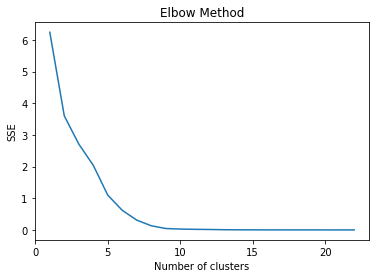

In [53]:
max_k = 23
sse = []
for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_normalized)
    sse.append(kmeans.inertia_)
plt.plot(range(1, max_k), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [54]:
k = 6
kmeans = KMeans(n_clusters=k)
kmeans.fit(df_normalized)

KMeans(n_clusters=6)

In [55]:
cluster_predictions = kmeans.predict(df_normalized)
df['cluster_id'] = cluster_predictions
df

,personnel,operation,invest,subsidy,others,cluster_id
0,16500.0,77489.1,74255.0,191059.4,16404.6,4
1,3808.5,2580.7,5924.1,8702.8,12401.5,0
2,85803.6,21613.9,6977.8,3283.1,75270.7,0
3,11239.7,6396.6,2686.6,663.5,164865.8,3
4,2791.6,2398.5,908.7,1035.6,1433.0,0
5,1159.8,1056.3,2971.0,1293.8,1450.9,0
6,2572.9,3808.5,584.5,2358.4,187.5,0
7,24049.9,13851.4,40273.9,1572.9,1251.4,0
8,8644.7,2231.6,99034.5,40.8,770.9,5
9,9772.1,6478.9,11313.3,1115.2,1565.9,0


In [56]:
df.cluster_id.value_counts()

0    17
5     1
4     1
3     1
2     1
1     1
Name: cluster_id, dtype: int64

In [57]:
print(metrics.davies_bouldin_score(df,kmeans.labels_))

0.18638082249968133


In [58]:
df[df.cluster_id==0].mean()

personnel     17448.688235
operation      5791.405882
invest         5626.911765
subsidy        4423.488235
others         6178.611765
cluster_id        0.000000
dtype: float64

In [59]:
df.to_csv('cluster_res_kmean58.csv')